# Linear Regression Assignment
1. Your observation is required after each analysis step
2. Minimum of 10 points should be listed in the Conclusion section

# Context
There is a huge demand for used cars after the COVID-19 pandemic. Dealership are still uncertain about both the pricing and supply of used cars compared to pre-COVID era. In this project, you will build a regression model to predict the future prices of used cars that a dealership can rely on the model prediction. 

# Key Questions
1. Key features in effectively predicting the price of the used cars? 
2. Best accuracy score of a good predictive model?
3. Best price for used cars a dealership will never sell any car less than that?

# Data Description  

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
0. Engine : The displacement volume of the engine in CC.
1. Power : The maximum power of the engine in bhp.
2. Seats : The number of seats in the car.
3. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
4. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Python Good Coding Practice

In [ ]:
# this will help in making the Python code more structured automatically
# (good coding practice)
%load_ext nb_black

# Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings

warnings.filterwarnings("ignore")

# removing the limit from the number of displayed columns and rows
pd.set_option("display.max_columns", None)

# displaying 200 rows of the data frame, the default  is much smaller
pd.set_option("display.max_rows", 200)

# building linear regression model for prediction
from sklearn.linear_model import LinearRegression

# checking model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Loading Data

In [2]:
df = pd.read_csv("UsedCars.csv")

In [3]:
data = df.copy()

In [4]:
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


# Exploring the Data (EDA)

## Basic Properties of Data

In [5]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


# Shape of the dataset

In [7]:
data.shape

(7253, 14)

 - The dataset has 7253 rows and 14 cloumns.

# Data types and missing values. 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### Observation:
 - The dependent variable is Price. 
 - Price, New_price, Seats, Power, Engine, and Mileage all have missing variables. 
 - S.No, Kilometers_Driven, Year, Seats, and Price are numeric
 - All other columns are object type
 - I may need to convert some variable types.

In [9]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

### Observations:
   - Mileage has 2 missing values. 
   - Engine and Power both have 46 missing values. 
   - Seats has 53 missing values. 
   - New_Price has the most missing values with 6247.
   - Price has 1234 missing values. 

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


### Observations:

   - The kilometers driven has a wide range (171-6,500,000)
   - I predict the above wide range correlates with the year wide range of 1996-2019.
   - Cars are priced between 0.44-160 Lakhs.
   - 50% of the cars are priced less than or equal to 5.64 Lakhs. 

# Data Pre-processing
1. Handling data types
2. Handling missing values
3. Handling outliers

In [ ]:
data

In [11]:
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [12]:
for i in ["Name", "Location", "Fuel_Type", "Transmission", "Owner_Type", "Mileage", "Engine", "Power"]:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("#" * 50) # to separate each section

Unique values in Name are :
Mahindra XUV500 W8 2WD                             55
Maruti Swift VDI                                   49
Maruti Swift Dzire VDI                             42
Honda City 1.5 S MT                                39
Maruti Swift VDI BSIV                              37
                                                   ..
Honda BR-V i-VTEC VX MT                             1
Honda Accord VTi-L MT                               1
Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel     1
Mahindra Jeep MM 540 DP                             1
Tata Sumo DX                                        1
Name: Name, Length: 2041, dtype: int64
##################################################
Unique values in Location are :
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
#############################

### Observations:

   - Majority of the cars are being sold in Mumbai.
   - 207 cars come with a standard mileage of 17 kmpl. 
   - Most of the cars are manual. 
   - Only 2 of the cars are electric. 
   - The least amount of cars are sold in Ahmedabad. 
   - 74 bhp is the most popular power in this dataset. 

In [13]:
data.drop(["New_Price"], axis=1, inplace=True)

## Observations

   - Drop the "New Price" column because it has too many missing values. 

In [14]:
#The shape shifted to one less column. 
data.shape

(7253, 13)

In [15]:
#Drop all missing values. New shape has 5975 rows. 
data.dropna(inplace=True)
data.shape

(5975, 13)

In [16]:

data= data[data['Mileage']!= 'nan']

In [19]:
Correct_Mileage= []
for i in data.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Correct_Mileage.append(float(i))


In [20]:
data['Mileage']=Correct_Mileage

In [21]:
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.00,1248 CC,74 bhp,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.00,1120 CC,71 bhp,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498 CC,112 bhp,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.00,998 CC,67.1 bhp,5.0,2.65


## Observations

   - Changed the "Mileage" variable from an object to a float. 
   - Convert mileage from km/kg to kmpl

In [ ]:
#New price is gone, and Mileage is now a float. 
data.info()

# Data Visualization

## Univariate Analysis

In [22]:
# This function takes the numerical column as the input and returns the
# boxplots and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

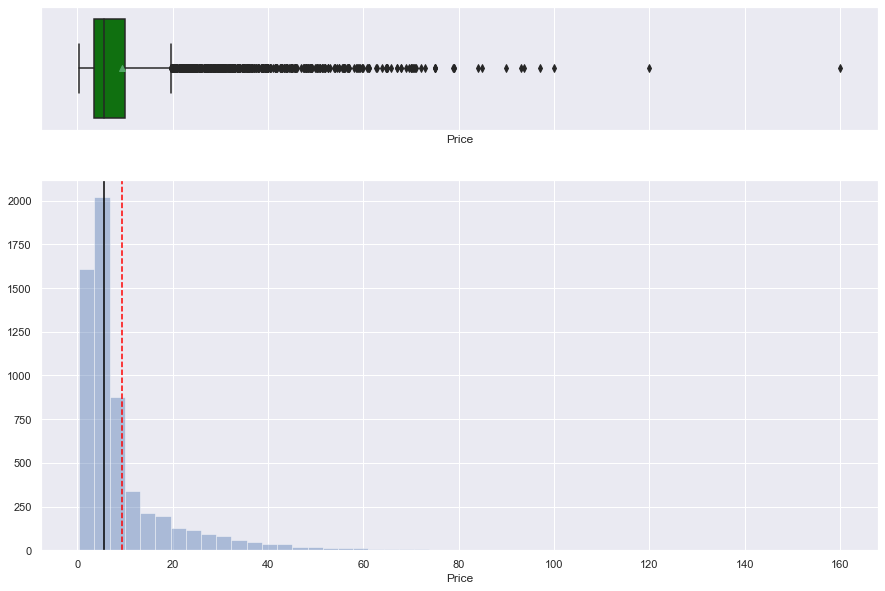

In [23]:
histogram_boxplot(data["Price"])

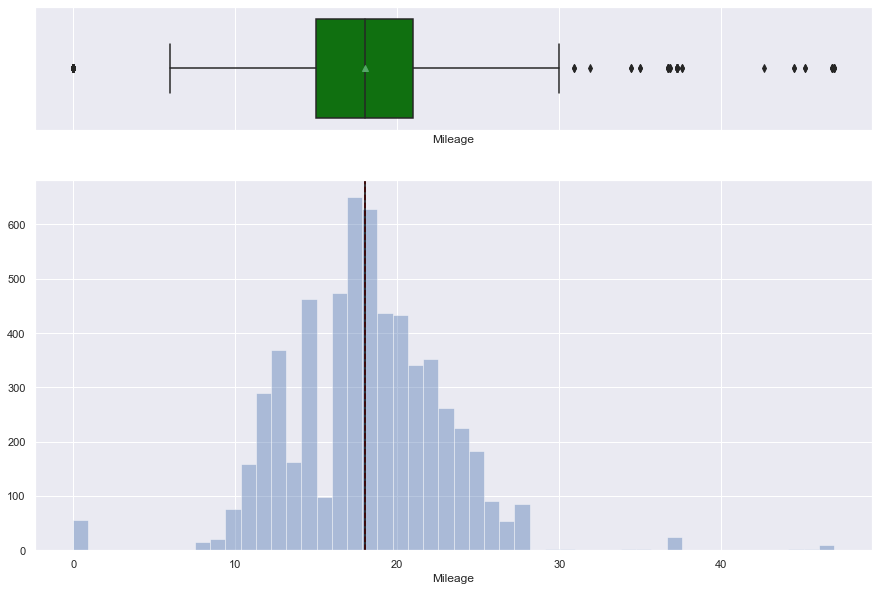

In [24]:
histogram_boxplot(data["Mileage"])

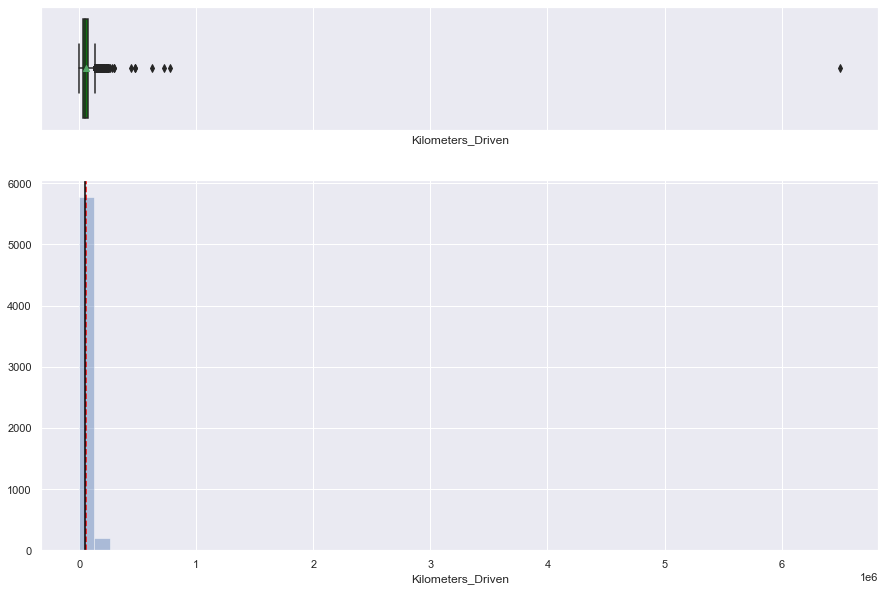

In [25]:
histogram_boxplot(data["Kilometers_Driven"])

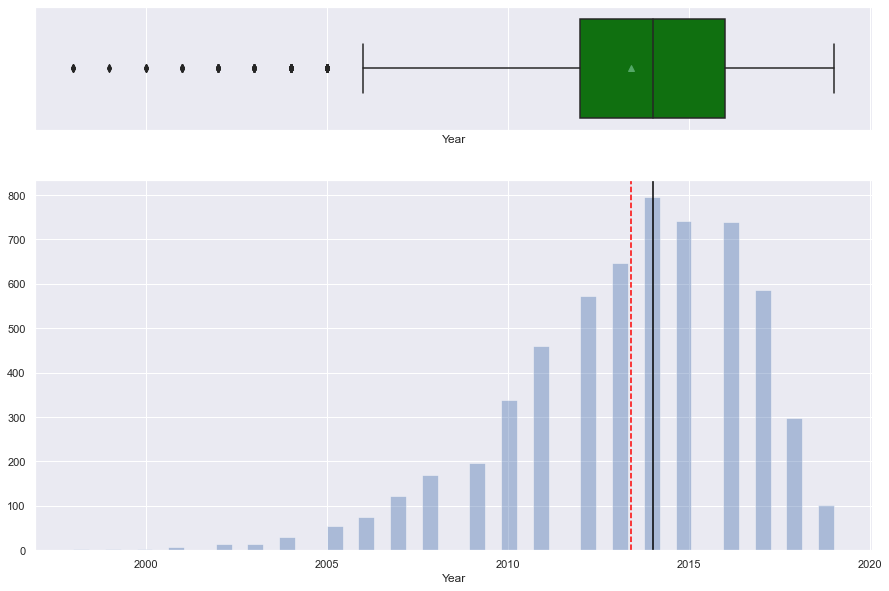

In [26]:
histogram_boxplot(data["Year"])

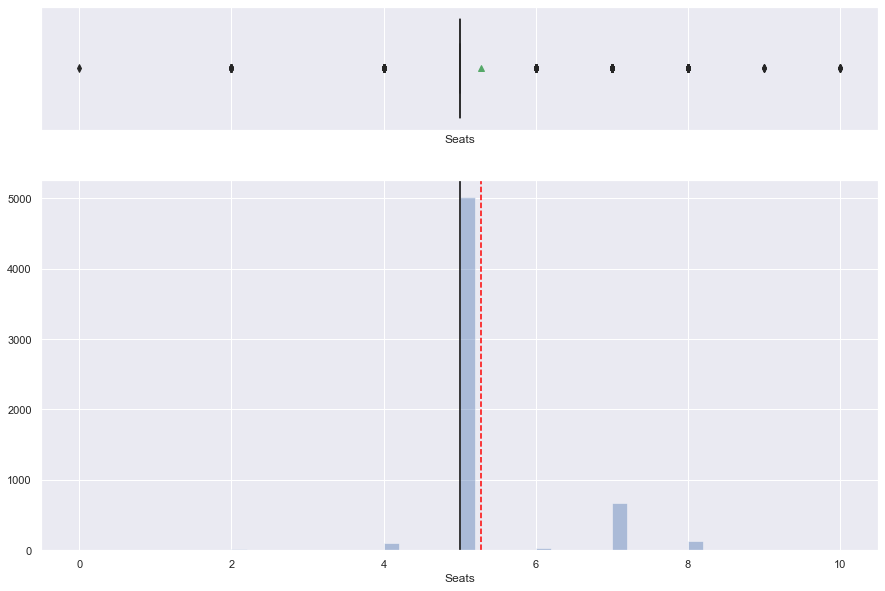

In [27]:
histogram_boxplot(data["Seats"])

## Observations

   - Mileage and seats are normally distributed. 
   - All the other variables seem to be right or left skewed. 

# Categorical Variables

In [28]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

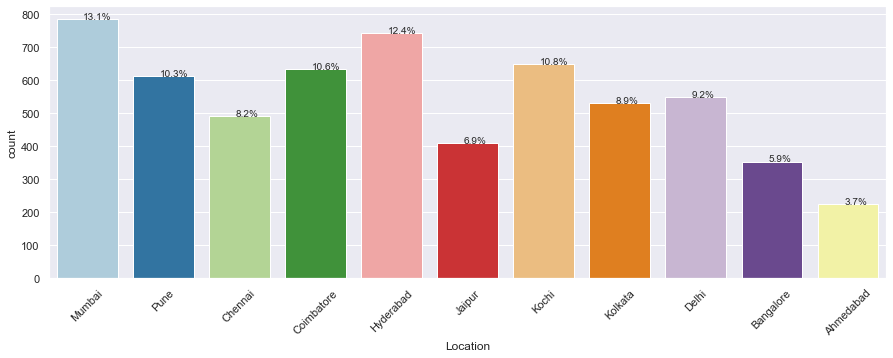

In [29]:
perc_on_bar(data, "Location")

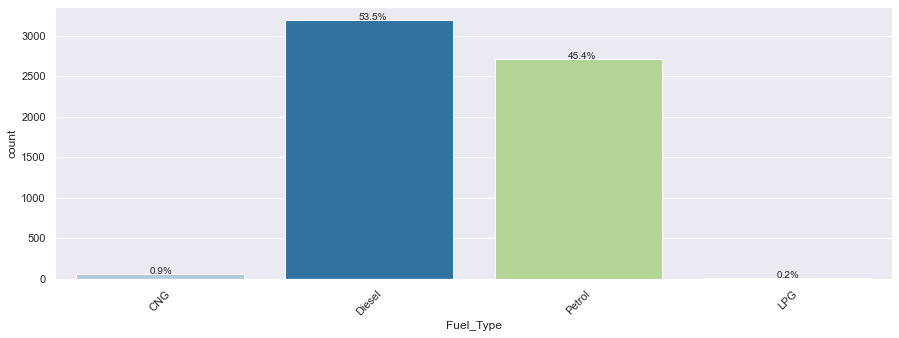

In [30]:
perc_on_bar(data, "Fuel_Type")

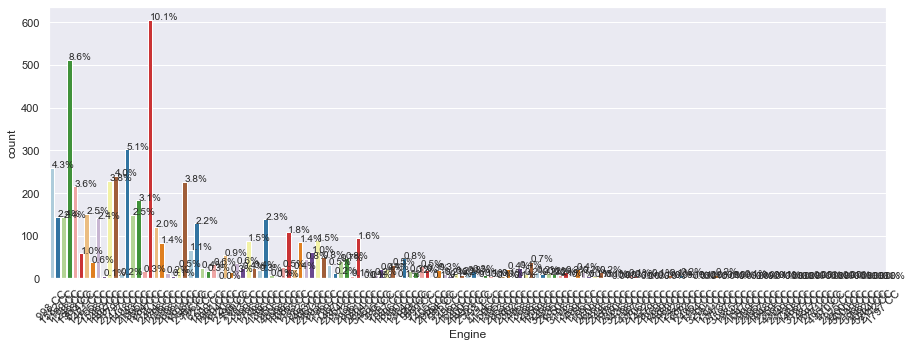

In [31]:
perc_on_bar(data, "Engine")

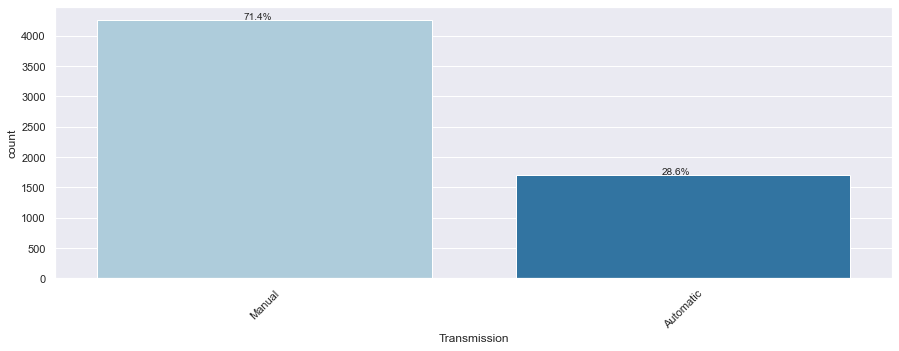

In [32]:
perc_on_bar(data, "Transmission")

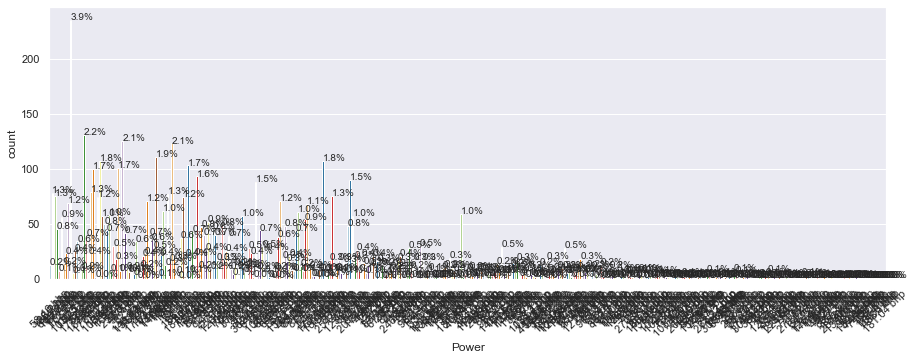

In [33]:
perc_on_bar(data, "Power")

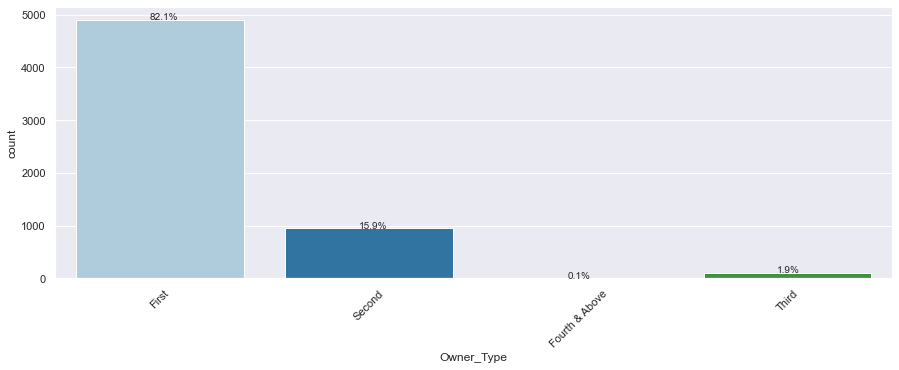

In [34]:
perc_on_bar(data, "Owner_Type")

## Observations 
   - Power and Engine graphs are very crowded. The variables should probably be converted to numbers. 
   - Mumbai and Hyderabad are the highest selling locations
   - Diesel and Petrol are the most common fuel types. 

## Bivariate analysis

# Log Transformations

### Checking numeric columns for skewness
- Some columns are very skewed and will likely behave better on the log scale

### Skewness before log transformations

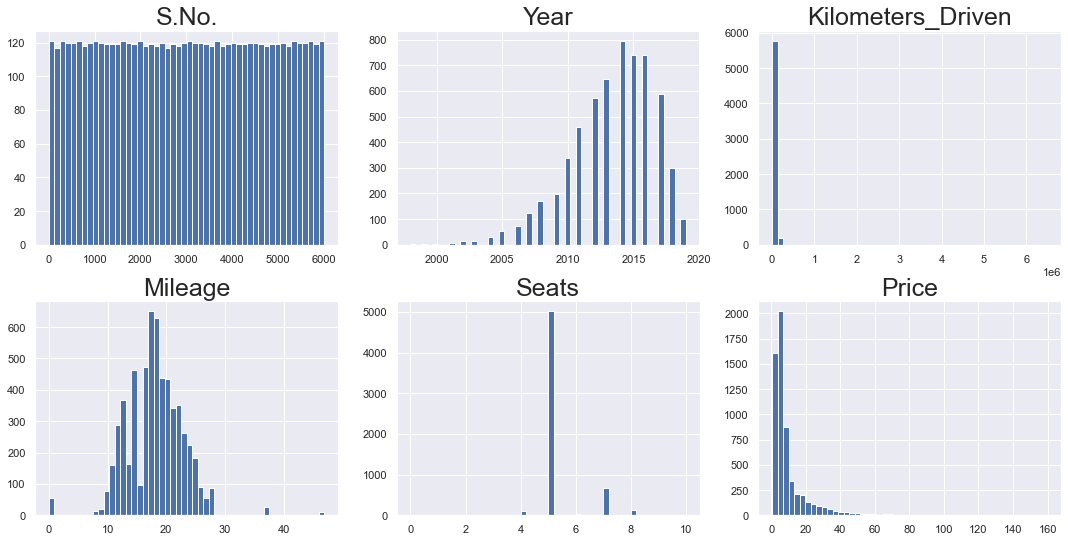

In [35]:
# creating a list of numeric columns
num_cols = [item for item in data.select_dtypes(include=np.number).columns]


# now, let's plot a histogram of all numeric columns
plt.figure(figsize=(15, 45))

for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[num_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(num_cols[i], fontsize=25)

plt.show()

- As seen, most of the columns have a very skewed distribution
- Since Mileage and Seats have normal distributions, and Price being the target variable, we can apply the log transformation to the rest columns to deal with skewness in the data

In [ ]:
# creating a list of skewed columns
num_cols.remove("Mileage")
num_cols.remove("Price")
num_cols.remove("Seats")
num_cols.remove("S.No.")

In [40]:
num_cols.remove("S.No.")

In [41]:
num_cols

['Year', 'Kilometers_Driven']

In [44]:
# applying log transforms on num_cols columns

for col in num_cols:
    data[col + "_log"] = np.log(data[col] + 1)

# dropping the original columns
data.drop(num_cols, axis=1, inplace=True)
data.head()

,S.No.,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Year_log,Kilometers_Driven_log
0,0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,1.75,7.606387,11.184435
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.60,1582 CC,126.2 bhp,5.0,12.50,7.608871,10.621352
2,2,Honda Jazz V,Chennai,Petrol,Manual,First,18.00,1199 CC,88.7 bhp,5.0,4.50,7.606885,10.736418
3,3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.70,1248 CC,88.76 bhp,7.0,6.00,7.607381,11.373675
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.00,1968 CC,140.8 bhp,5.0,17.74,7.607878,10.613271


In [ ]:
cars.shape

### Skewness after applying log transformations

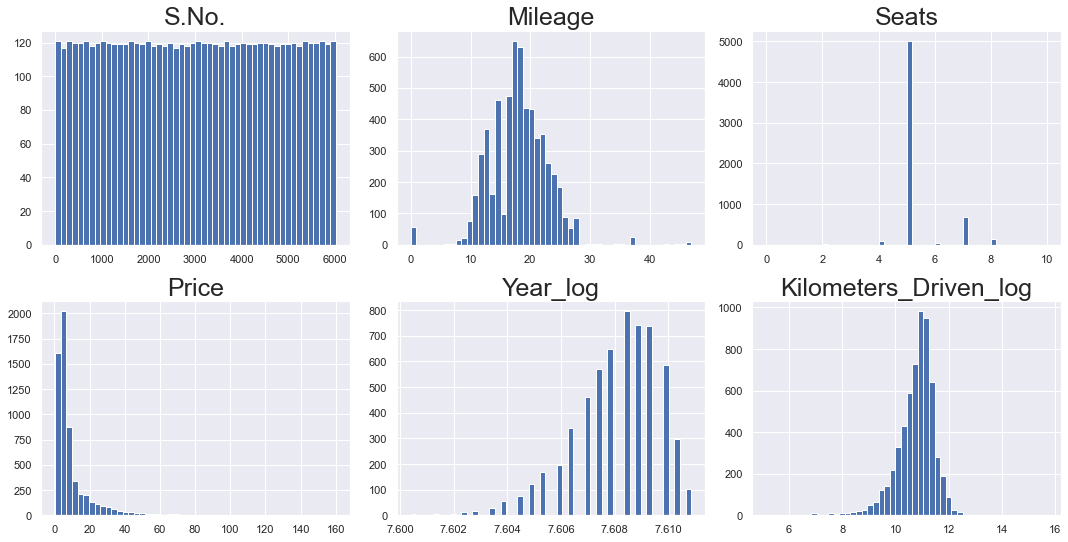

In [47]:
# creating a list of numeric columns
num_cols = [item for item in data.select_dtypes(include=np.number).columns]


# now, let's plot a histogram of all numeric columns
plt.figure(figsize=(15, 45))

for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[num_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(num_cols[i], fontsize=25)

plt.show()

- The columns are still skewed, but not as heavily as before log transformations

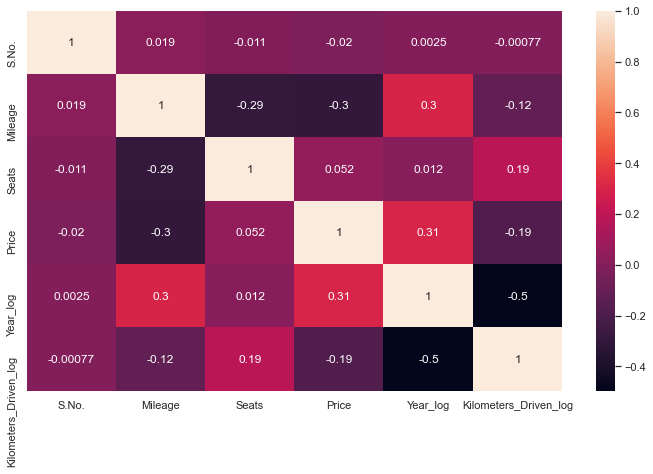

In [48]:
# checking correlations after applying log transformations
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

- There aren't that highly correlated columns to drop any column 

In [49]:
data.shape

(5975, 13)

# Outliers 

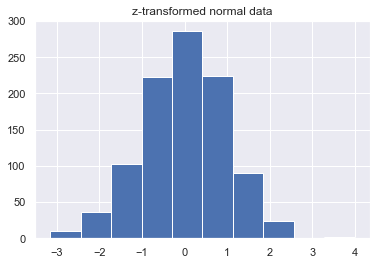

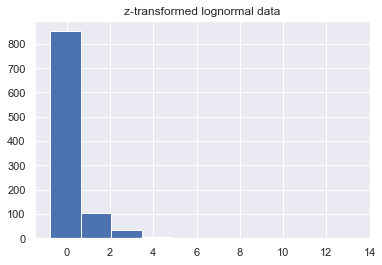

In [50]:
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)


np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title("z-transformed normal data")
plt.show()


plt.hist(z_transform(x2))
plt.title("z-transformed lognormal data")
plt.show()

In [51]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [0.25, 0.75]))
    return np.mean(np.abs(x - np.median(x)) > length)


print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


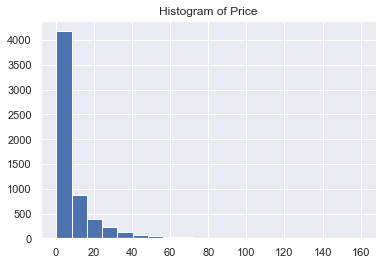

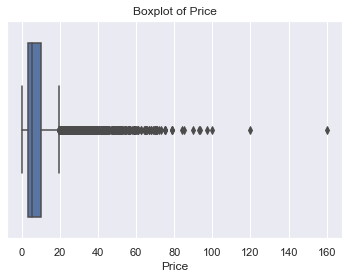

In [52]:
# let's for example look at Price
plt.hist(data["Price"], 20)
plt.title("Histogram of Price")
plt.show()

sns.boxplot(data["Price"])
plt.title("Boxplot of Price")
plt.show()

In [ ]:
# let's see how to handle outliers to see the sensitivity to outliers

In [53]:
quartiles = np.quantile(data["Price"][data["Price"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = data.loc[
    np.abs(data["Price"] - data["Price"].median()) > power_4iqr, "Price"
]
outlier_powers

Q1 = 3.5, Q3 = 9.95, 4*IQR = 25.799999999999997


67       35.67
92       39.58
134      54.00
148      37.00
168      45.00
         ...  
5919    100.00
5921     36.00
5927     45.52
5946     48.00
6008     45.00
Name: Price, Length: 323, dtype: float64

# Model Building

### Defining independent and dependent variables

In [56]:
ind_vars = data.drop(["Price"], axis=1) # all variables are independent except for the *rating*
dep_var = data[["Price"]] # the only dependent variable is the *rating*, the target variable

### Creating dummy variables

In [57]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

S.No.  Mileage  Seats  Year_log  Kilometers_Driven_log  \
0      0    37.24    5.0  7.606387              11.184435   
1      1    19.60    5.0  7.608871              10.621352   
2      2    18.00    5.0  7.606885              10.736418   
3      3    20.70    7.0  7.607381              11.373675   
4      4    15.00    5.0  7.607878              10.613271   

   Name_Audi A3 35 TDI Attraction  Name_Audi A3 35 TDI Premium  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   Name_Audi A3 35 TDI Premium Plus  Name_Audi A3 35 TDI Technology  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Name_Audi A4 1.8 TFSI  Name_Audi A4 1.8 TFSI Technology Edition  \
0                      0                                         0   
1                      0                                         0   
2                      0                                         0   
3                      0                                         0   
4                      0                                         0   

   Name_Audi A4 2.0 TDI  Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                     0                                          0   
1                     0                                          0   
2                     0                                          0   
3                     0                                          0   
4                     0                                          0   

   Name_Audi A4 2.0 TDI 177 Bhp Technology Edition  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Name_Audi A4 2.0 TDI Celebration Edition  Name_Audi A4 2.0 TDI Multitronic  \
0                                         0                                 0   
1                                         0                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   

   Name_Audi A4 2.0 TDI Premium Sport Limited Edition  Name_Audi A4 2.0 TFSI  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   

   Name_Audi A4 3.0 TDI Quattro  Name_Audi A4 3.0 TDI Quattro Premium  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   Name_Audi A4 3.2 FSI Tiptronic Quattro  Name_Audi A4 30 TFSI Premium Plus  \
0                                       0                                  0   
1                                       0                                  0  

### Splitting data into train and test 

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ind_vars_num, dep_var, test_size=0.3, random_state=1)

In [60]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4182
Number of rows in test data = 1793


### Fitting a linear model

In [61]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [63]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
S.No.,0.000004
Mileage,-0.156024
Seats,-0.212532
Year_log,1642.419556
Kilometers_Driven_log,-1.023848
...,...
Power_98.96 bhp,-0.531073
Power_99 bhp,-2.381474
Power_99.6 bhp,-1.316574
Power_null bhp,-1.607317


# Model Performance Check

- Using metric functions to define in sklearn for RMSE, MAE, and 𝑅2.
- Defining a function to calculate adjusted  𝑅2.

In [64]:
# let's create a function that will print out all the above metrics in one step
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

### Checking model performance on train set

In [65]:
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  1.825088  0.917905  0.972959      0.936875


### Checking model performance on test set

In [66]:
print("Test Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  4.812183  2.049316  0.823143       1.52998


# Conclusion 
### Minimum of 10 points should be listed in the Conclusion section

- The test RSME is greater than the train RSME which indicates overfitting. 
- The training set has a higher R^2 than the testing set. 
- The r^2 on the testing model isn't as great as the training model. 
- Overall the model may be a bit too complicated for the dataset causing overfitting, but the model is otherwise an okay model. 

# Sources

- Dr. DeBary Lectures
- Kaggle- https://www.kaggle.com/code/rushikeshhiray/converting-km-kg-to-kmpl/notebook
